In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import glob

pdata = pd.read_csv("Flight data/Passenger data.csv", sep=',')[["PASSENGERS", "AIRLINE_ID", "CARRIER_NAME", "ORIGIN_CITY_NAME", "DEST_CITY_NAME","MONTH"]]

# df1 = DataFrame(pdata.groupby(["AIRLINE_ID", "CARRIER_NAME","ORIGIN_CITY_NAME", "DEST_CITY_NAME"])["PASSENGERS"].count())
df1 = DataFrame(pdata.groupby(["AIRLINE_ID", "CARRIER_NAME"])["PASSENGERS"].sum())
# df1.to_csv("passengers.csv")
df1.sort_values(by='PASSENGERS', ascending=False).head(n=25).reset_index()

,AIRLINE_ID,CARRIER_NAME,PASSENGERS
0,19393,Southwest Airlines Co.,148878754.0
1,19790,Delta Air Lines Inc.,119168590.0
2,19805,American Airlines Inc.,116702019.0
3,19977,United Air Lines Inc.,73916601.0
4,20409,JetBlue Airways,31238983.0
5,20304,SkyWest Airlines Inc.,29101892.0
6,19930,Alaska Airlines Inc.,22642716.0
7,20366,ExpressJet Airlines Inc.,20571842.0
8,20416,Spirit Air Lines,19183049.0
9,20436,Frontier Airlines Inc.,14105325.0


In [2]:
fdata = pd.read_csv("Flight data/Financial data.csv", sep=',')
df2 = DataFrame(fdata.groupby(["AIRLINE_ID", "CARRIER_NAME"])["NET_INCOME"].sum())
# df2.to_csv("income.csv")
df2.sort_values(by='NET_INCOME', ascending=False).head(n=20).reset_index()

,AIRLINE_ID,CARRIER_NAME,NET_INCOME
0,19790,Delta Air Lines Inc.,3776999.00
1,19805,American Airlines Inc.,2440628.93
2,19977,United Air Lines Inc.,1866994.37
3,19393,Southwest Airlines Co.,1719647.00
4,20107,Federal Express Corporation,1254113.00
5,19930,Alaska Airlines Inc.,714400.00
6,20409,JetBlue Airways,578608.60
7,20368,Allegiant Air,275369.30
8,20416,Spirit Air Lines,249581.73
9,20436,Frontier Airlines Inc.,169898.19


In [4]:
avgfare = df1.merge(df2, how = 'inner', left_index = True, right_index=True)
avgfare = avgfare[avgfare.PASSENGERS != 0]
avgfare['AVERAGE_FARE'] = avgfare['PASSENGERS']/avgfare['NET_INCOME']
avgfare_df=avgfare.reset_index()

In [5]:
print(avgfare_df["CARRIER_NAME"])

0                      Southwest Airlines Co.
1                                 Horizon Air
2                      Hawaiian Airlines Inc.
3                        Delta Air Lines Inc.
4                      American Airlines Inc.
5                        Alaska Airlines Inc.
6                       United Air Lines Inc.
7                              Atlas Air Inc.
8                 Air Wisconsin Airlines Corp
9                           Island Air Hawaii
10                      SkyWest Airlines Inc.
11                          Endeavor Air Inc.
12                   ExpressJet Airlines Inc.
13                              Allegiant Air
14                           Omni Air Express
15                         Mesa Airlines Inc.
16                          PSA Airlines Inc.
17                                  Envoy Air
18                    Miami Air International
19                            JetBlue Airways
20                           Spirit Air Lines
21     Sun Country Airlines d/b/a 

In [6]:
df2.head(n=20)
userinput=input("Enter a airline you want to see consolidated results")

Enter a airline you want to see consolidated resultsJet Aviation Flight Services, Inc.


In [10]:
avgfare_df2=avgfare_df[avgfare_df["CARRIER_NAME"]==userinput]

In [11]:
avgfare_df2

,AIRLINE_ID,CARRIER_NAME,PASSENGERS,NET_INCOME,AVERAGE_FARE
32,21652,"Jet Aviation Flight Services, Inc.",2320.0,5587.8,0.41519


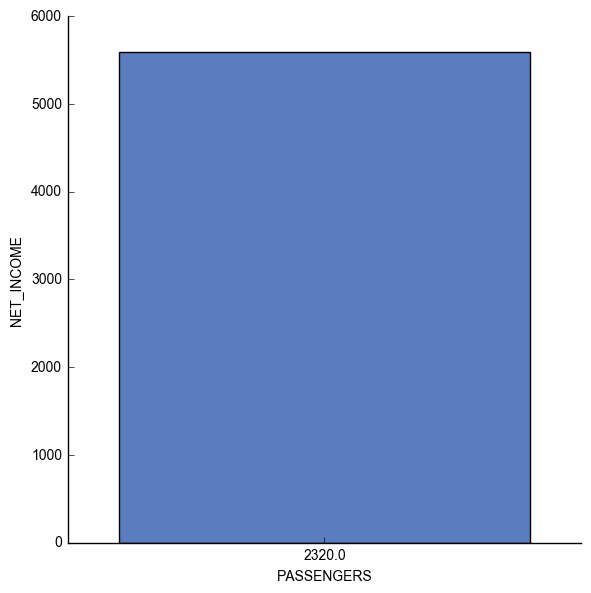

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline
ax=sns.factorplot("PASSENGERS", "NET_INCOME",
                               data=avgfare_df2, kind="bar",
                               size=6, palette="muted", legend=False)
#plt.savefig(r'Output Files\Analysis 1\Plot\Restaurant-Per-Capita.jpg')
            #print('CSV Files and Plots saved successfully')
#plt.title("Restaurant per Capita (every 1000 people)for "+str(cityinput)+str(" ")+str("compared to other cities in ")+str(countryinput),fontsize=15)
plt.show()

In [17]:
import matplotlib